In [56]:
import sys
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import geopandas as gpd
import rioxarray
from eofs.xarray import Eof
from xeofs.xarray import EOF
import gc
import collections
import statsmodels.api as sm
import scipy
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import product
import pyproj
import meshio

In [42]:
from geometric_features import FeatureCollection, read_feature_collection
from mpas_analysis.shared.analysis_task import AnalysisTask
from mpas_analysis.shared.constants import constants
from mpas_analysis.shared.plot import timeseries_analysis_plot, savefig, add_inset
from mpas_analysis.shared.io import open_mpas_dataset, write_netcdf
from mpas_analysis.shared.io.utility import build_config_full_path, make_directories, build_obs_path, decode_strings
from mpas_analysis.shared.html import write_image_xml
from mpas_analysis.ocean import time_series_antarctic_melt

In [57]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'

# DATA FILE PATHS

# Data containing regridded flux and SSH for 150 years
regriddedFluxSSH_filepath = 'data/interim/RegriddedFluxSSH.nc'

# File contains all defined ice shelves
iceShelvesShape_filepath = 'data/interim/iceShelves.geojson'

# Folder for output figures
figures_folderpath = 'reports/figures/' 

interim_data_folder = 'data/interim/'
processed_data_folder = 'data/processed/'
pace_MALI_data_folder = 'PACE-MALI-test/'
pace_MALI_test = 'data/PACE-MALI-test/16proc_run/'
flux_dedrafted_data_path = 'dedrafted_flux_IMBIE/'
randomized_realizations_path = 'randomized_realizations/'
flux_dedrafted_iceshelves_data_path = 'iceshelves_dedrafted_flux/'
reconstructions_neofs_path = 'reconstructions_neofs/'

In [58]:
fluxSSH = xr.open_dataset(inDirName+regriddedFluxSSH_filepath)

In [64]:
flux_clean = xr.open_dataset(inDirName+interim_data_folder+'flux_clean')
flux_clean = flux_clean.timeMonthly_avg_landIceFreshwaterFlux

In [67]:
flux_clean_mean = flux_clean.mean('time')

In [59]:
fl = fluxSSH.timeMonthly_avg_landIceFreshwaterFlux
h = fluxSSH.timeMonthly_avg_ssh

In [60]:
fl_ts = fl.sum(['y','x'])

In [62]:
flmean = fl.mean('time')

In [ ]:
plt.figure(figsize=(25,8))
plt.scatter(fl[300:],h[300:])

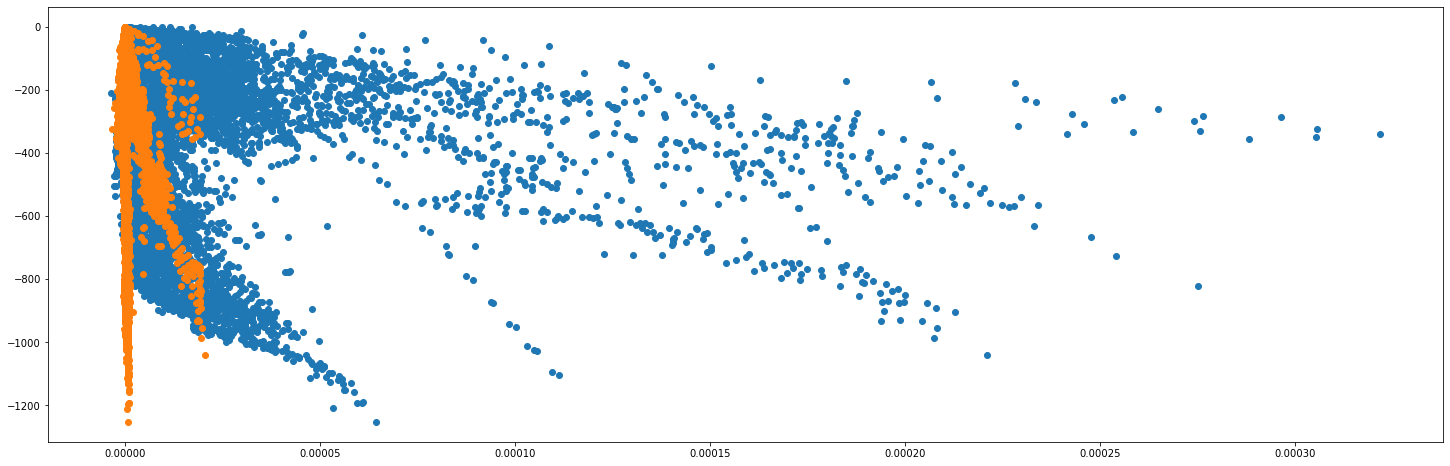

In [70]:
plt.figure(figsize=(25,8))
plt.scatter(flmean,h[0])
plt.scatter(flux_clean_mean,h[1000])

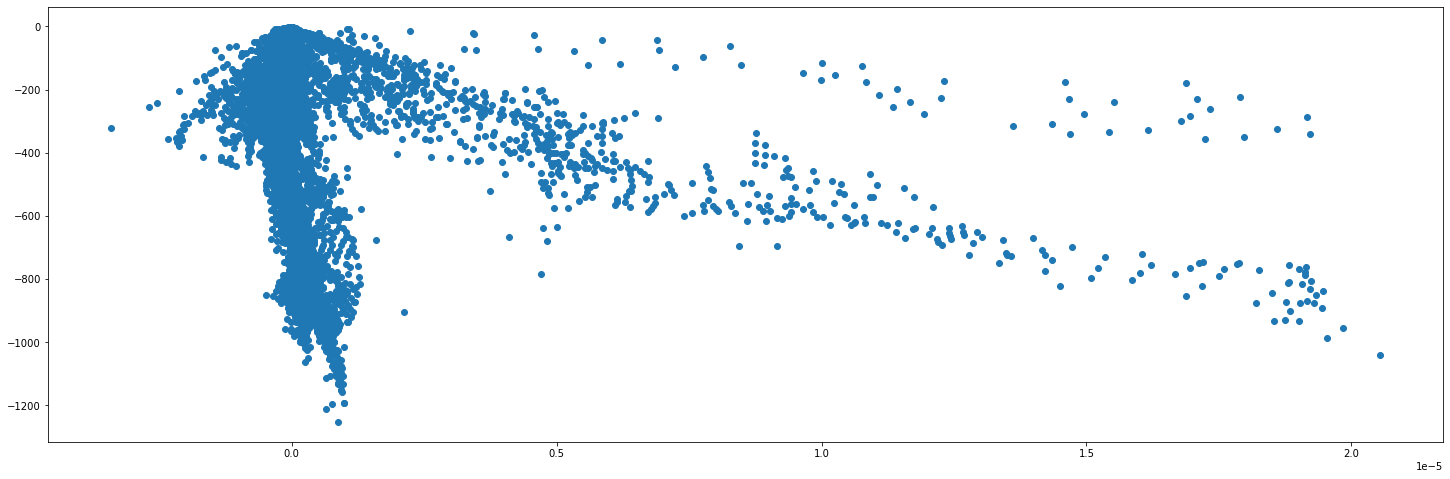

In [69]:
plt.figure(figsize=(25,8))
plt.scatter(flux_clean_mean,h[1000])

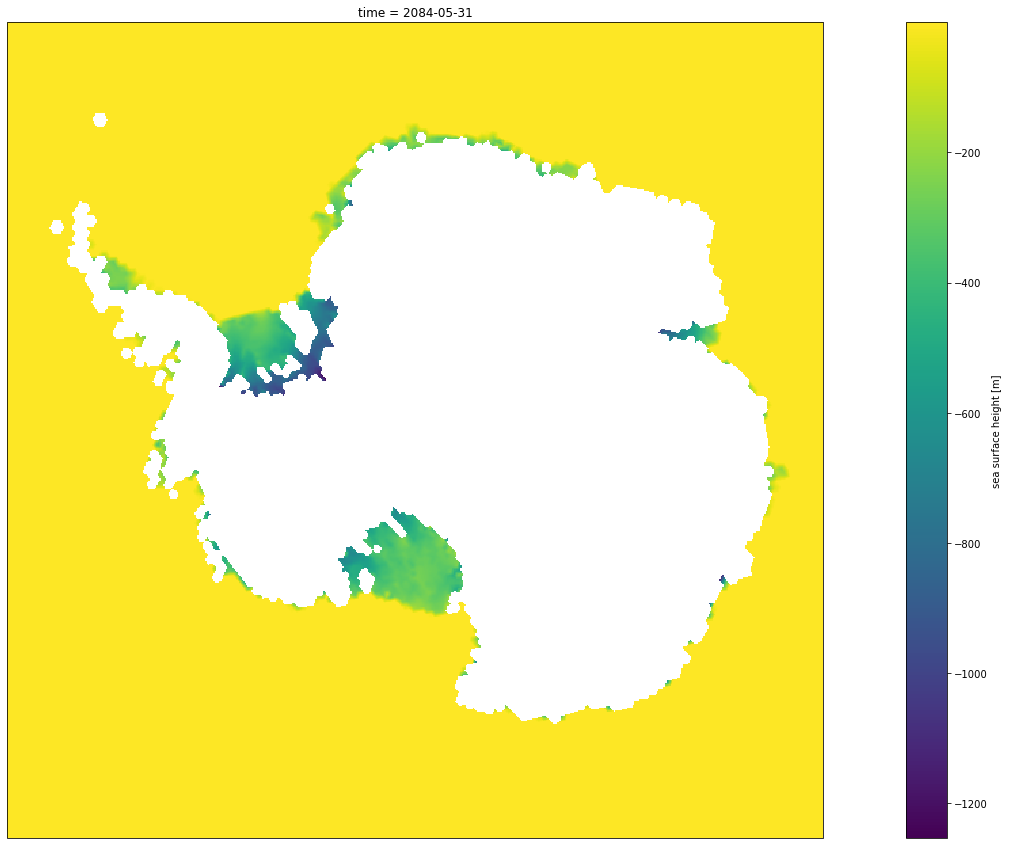

In [54]:
plt.figure(figsize=(30,15))
plt.subplot(111, projection=ccrs.SouthPolarStereo())
h[1000].plot()

In [3]:
thw16run = xr.open_dataset(inDirName+interim_data_folder+pace_MALI_data_folder+'thwaites.4km.210608.nc')

In [14]:
basalHeatFlux = thw16run.basalHeatFlux

In [17]:
exo = meshio.read(inDirName+pace_MALI_test+'albany_output.exo.16.00',file_format="exo")

ReadError: Unknown file format 'exo' of '/Users/smurugan9/research/aislens/aislens_emulation/data/PACE-MALI-test/16proc_run/albany_output.exo.16.00'.

In [6]:
testresults = xr.open_dataset(inDirName+pace_MALI_test+'albany_output.exo.16.00',file_format="exo")

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [ ]:
xr.op